<a href="https://colab.research.google.com/github/CodingPenguins/ML2UnsupervisedPenguins/blob/main/ML_Unsupervised_Project_Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Oh my Gentoo!
An unsupervised learning approach for predicting Pygoscelis papua (or Gentoo penguin) sex

---



# Introduction

The corresponding GitHub repository can be found here:

## Data Source

The project is based on the study and its acquired data of:


    Palmer Station Antarctica LTER and K. Gorman. 2020. Structural size measurements and isotopic signatures of foraging among adult male and female gentoo penguins (Pygoscelis papua) nesting along the Palmer Archipelago near Palmer Station, 2007-2009 ver 7. Environmental Data Initiative. https://doi.org/10.6073/pasta/9fc8f9b5a2fa28bdca96516649b6599b (Accessed 2024-04-21).


The data is provided via the Environmental Data Initiative (EDI) here:

https://portal.edirepository.org/nis/mapbrowse?packageid=knb-lter-pal.220.7

It contains 124 observations of individual penguions for Gentoo penguin breeding pairs taken in the years 2007-2009, in particular dimension and blood marker measurements, as well as the individual penguin's sex. The study examined sexual size dimorphism of penguins.

## Project scope and aim

Learning about penguins means to gather more information crucial for understanding not only their behaviour, but also their habitats and food sources and their impact on whether penguin colonies prosper or decline. In view of the monumental challenges humanity has to face in terms of climate change and its inevitable effect on biodiversity, we need to have a good understanding of species that thrive in adverse conditions.

Since every research endevour is limited by the resources of the research community, in particular in view of the limited number of scientist available, reducing the number of measurements routinely performed frees time for other tasks. As such, leveraging unmeasured information from existing measurements might help.

In this respect, the aim of the project is to predict a penguin's sex on the basis of as few markers as possible, and evaluate how accurate this algorithm can perform on the dataset available.

# EDA: Data explanation, cleaning, transformation

The purpose of the EDA section is to gain a good understanding of the dataset provided. Afterwards, we should clean it in terms of unnecessary information as well as unreasonable or NAN values and prepare it for the classification task.

Python packages to be included:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scipy
import sklearn as sklearn
import datetime, time
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import NMF

from mpl_toolkits import mplot3d

Importing the penguin data set as discussed in the introductory section:

In [ ]:
source = "https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-pal.220.7&entityid=e03b43c924f226486f2f0ab6709d2381"
penguin = pd.read_csv(source)
penguin.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N31A1,Yes,2007-11-27,46.1,13.2,211.0,4500.0,FEMALE,7.99300,-25.51390,NaN
1,PAL0708,2,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N31A2,Yes,2007-11-27,50.0,16.3,230.0,5700.0,MALE,8.14756,-25.39369,NaN
2,PAL0708,3,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N32A1,Yes,2007-11-27,48.7,14.1,210.0,4450.0,FEMALE,8.14705,-25.46172,NaN
3,PAL0708,4,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N32A2,Yes,2007-11-27,50.0,15.2,218.0,5700.0,MALE,8.25540,-25.40075,NaN
4,PAL0708,5,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N33A1,Yes,2007-11-18,47.6,14.5,215.0,5400.0,MALE,8.23450,-25.54456,NaN


In [ ]:
penguin.describe()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,124.000000,123.000000,123.000000,123.000000,123.000000,122.000000,122.000000
mean,62.500000,47.504878,14.982114,217.186992,5076.016260,8.245338,-26.185298
std,35.939764,3.081857,0.981220,6.484976,504.116237,0.264470,0.538554
min,1.000000,40.900000,13.100000,203.000000,3950.000000,7.632200,-27.018540
25%,31.750000,45.300000,14.200000,212.000000,4700.000000,8.102775,-26.690912
50%,62.500000,47.300000,15.000000,216.000000,5000.000000,8.251170,-26.221575
75%,93.250000,49.550000,15.700000,221.000000,5500.000000,8.418402,-25.640160
max,124.000000,59.600000,17.300000,231.000000,6300.000000,8.833520,-25.001690


In [ ]:
penguin.shape

(124, 17)

So, our data set contains 124 observations with 17 distinct variables. We have a studyName in which the respective data was collected, a sample number, the species (Gentoo) observed, as well as two regional indicators of the samples (Region, Island), all of which are true strings. We further have a stage indication of the observed animal (Stage, also str), an individual ID associated with the penguin (Individual ID, true integer) so to indicate recurring penguins. The entry "Clutch Completion" indicates whether a second egg completed the nest (True Boolean, currently str). A string Date Egg indicates when the study observed the nest with 1 egg. Further, we have float values indicating the Culmen Length and Depth as well as the flipper length in mm and the body mass in g. Further, we have two float columns describing the "a measure of the ratio of stable isotopes 15N:14N" as well as  "a measure of the ratio of stable isotopes 13C:12C" (Delta 15 N and Delta 13 C, respectively).

So, before doing anything else, let us reduce our dataframe by dropping any columns not suitable for our purpose. For example, stage, species, region and island only contains the same unique entry:

In [ ]:
list(map(set,penguin[["Species"]].values.T))

[{'Gentoo penguin (Pygoscelis papua)'}]

In [ ]:
list(map(set,penguin[["Region"]].values.T))

[{'Anvers'}]

In [ ]:
list(map(set,penguin[["Island"]].values.T))

[{'Biscoe'}]

In [ ]:
list(map(set,penguin[["Stage"]].values.T))

[{'Adult, 1 Egg Stage'}]

Also sample number is just a running index. Further, the studyNames do not give any indication going beyond the rough time frame in which the respective studies where conducted - and for this, we have Date Egg:

In [ ]:
list(map(set,penguin[["studyName"]].values.T))

[{'PAL0708', 'PAL0809', 'PAL0910'}]

In [ ]:
list(map(set,penguin[["Date Egg"]].values.T))

[{'2007-11-18',
  '2007-11-27',
  '2007-11-29',
  '2007-12-03',
  '2008-11-02',
  '2008-11-03',
  '2008-11-04',
  '2008-11-06',
  '2008-11-09',
  '2008-11-13',
  '2009-11-09',
  '2009-11-10',
  '2009-11-15',
  '2009-11-18',
  '2009-11-20',
  '2009-11-22',
  '2009-11-25',
  '2009-11-27',
  '2009-12-01'}]

In [ ]:
penguin2 = penguin.drop(["Stage", "Species", "Region", "Island", "Sample Number", "studyName"], axis=1)
penguin2

,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,N31A1,Yes,2007-11-27,46.1,13.2,211.0,4500.0,FEMALE,7.99300,-25.51390,NaN
1,N31A2,Yes,2007-11-27,50.0,16.3,230.0,5700.0,MALE,8.14756,-25.39369,NaN
2,N32A1,Yes,2007-11-27,48.7,14.1,210.0,4450.0,FEMALE,8.14705,-25.46172,NaN
3,N32A2,Yes,2007-11-27,50.0,15.2,218.0,5700.0,MALE,8.25540,-25.40075,NaN
4,N33A1,Yes,2007-11-18,47.6,14.5,215.0,5400.0,MALE,8.23450,-25.54456,NaN
...,...,...,...,...,...,...,...,...,...,...,...
119,N38A2,No,2009-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled. Nest never observed with fu...
120,N39A1,Yes,2009-11-22,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
121,N39A2,Yes,2009-11-22,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
122,N43A1,Yes,2009-11-22,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


Let us shorten the remaining names before continuing:

In [ ]:
penguin3 = penguin2.rename(columns={"Individual ID": "IID", "Clutch Completion": "clutch", "Date Egg":"eggdate","Culmen Length (mm)": "clength", "Culmen Depth (mm)": "cdepth", "Flipper Length (mm)": "flength", "Body Mass (g)":"weight", "Sex":"sex", "Delta 15 N (o/oo)":"delta15N", "Delta 13 C (o/oo)":"delta13C" 	})

In [ ]:
penguin3

,IID,clutch,eggdate,clength,cdepth,flength,weight,sex,delta15N,delta13C,Comments
0,N31A1,Yes,2007-11-27,46.1,13.2,211.0,4500.0,FEMALE,7.99300,-25.51390,NaN
1,N31A2,Yes,2007-11-27,50.0,16.3,230.0,5700.0,MALE,8.14756,-25.39369,NaN
2,N32A1,Yes,2007-11-27,48.7,14.1,210.0,4450.0,FEMALE,8.14705,-25.46172,NaN
3,N32A2,Yes,2007-11-27,50.0,15.2,218.0,5700.0,MALE,8.25540,-25.40075,NaN
4,N33A1,Yes,2007-11-18,47.6,14.5,215.0,5400.0,MALE,8.23450,-25.54456,NaN
...,...,...,...,...,...,...,...,...,...,...,...
119,N38A2,No,2009-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled. Nest never observed with fu...
120,N39A1,Yes,2009-11-22,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
121,N39A2,Yes,2009-11-22,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
122,N43A1,Yes,2009-11-22,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


Regarding the remaining entries, we have

In [ ]:
len((list(map(set,penguin[["Individual ID"]].values.T)))[0])

94

unique individuals, so that 124-94=30 observations are repeated measurements. We do not have to delete those at first, but need to keep in mind that any statistics are biased towards those recurrent measured penguins.

How about NaN values?

In [ ]:
obs_item = ["clength", "cdepth", "flength", "weight", "delta15N", "delta13C"]
#print(penguin3["clength"][np.isnan(penguin3["clength"])])
for item in obs_item:
  print(penguin3[item][np.isnan(penguin3[item])])


119   NaN
Name: clength, dtype: float64
119   NaN
Name: cdepth, dtype: float64
119   NaN
Name: flength, dtype: float64
119   NaN
Name: weight, dtype: float64
30    NaN
119   NaN
Name: delta15N, dtype: float64
30    NaN
119   NaN
Name: delta13C, dtype: float64


In [ ]:
print(penguin3.loc[119]["Comments"])
print(penguin3.loc[30]["Comments"])

Adult not sampled. Nest never observed with full clutch.
Not enough blood for isotopes.


Regarding the observation 119, no measurements were taken - we should drop this row entirely. For 30, we only lack the blood sample values, which we could impute from the data. However, since our data set is not long, we might bias our results depending on the method chosen: Should it be a general average for imputation? A outcome (sex) specific average? As  only 1 observation is affected, we decide to drop this as well instead of imputing a specific value.

In [ ]:
penguin4 = penguin3.dropna(subset=['delta15N'])

In [ ]:
penguin4

,IID,clutch,eggdate,clength,cdepth,flength,weight,sex,delta15N,delta13C,Comments
0,N31A1,Yes,2007-11-27,46.1,13.2,211.0,4500.0,FEMALE,7.99300,-25.51390,NaN
1,N31A2,Yes,2007-11-27,50.0,16.3,230.0,5700.0,MALE,8.14756,-25.39369,NaN
2,N32A1,Yes,2007-11-27,48.7,14.1,210.0,4450.0,FEMALE,8.14705,-25.46172,NaN
3,N32A2,Yes,2007-11-27,50.0,15.2,218.0,5700.0,MALE,8.25540,-25.40075,NaN
4,N33A1,Yes,2007-11-18,47.6,14.5,215.0,5400.0,MALE,8.23450,-25.54456,NaN
...,...,...,...,...,...,...,...,...,...,...,...
118,N38A1,No,2009-12-01,47.2,13.7,214.0,4925.0,FEMALE,7.99184,-26.20538,Nest never observed with full clutch.
120,N39A1,Yes,2009-11-22,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
121,N39A2,Yes,2009-11-22,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
122,N43A1,Yes,2009-11-22,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


So how about the distributions?

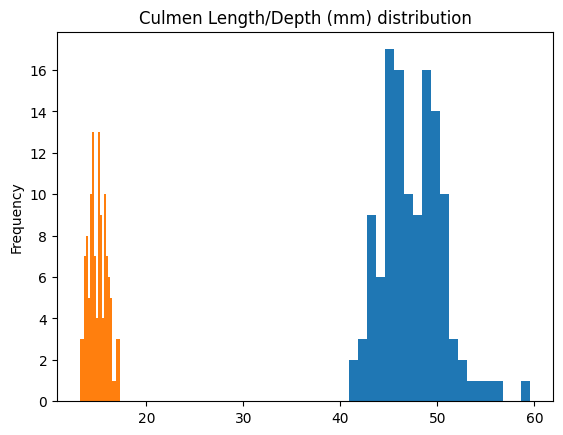

In [ ]:
plt1 = penguin4['clength'].plot(kind='hist', bins=20, title='Culmen Length/Depth (mm) distribution')  #, )
penguin4['cdepth'].plot(kind='hist', bins=20)

plt.legend()

The distributions of culmen length and depth do not contain unreasonable lengths (as also visible from the distribution presented earlier).

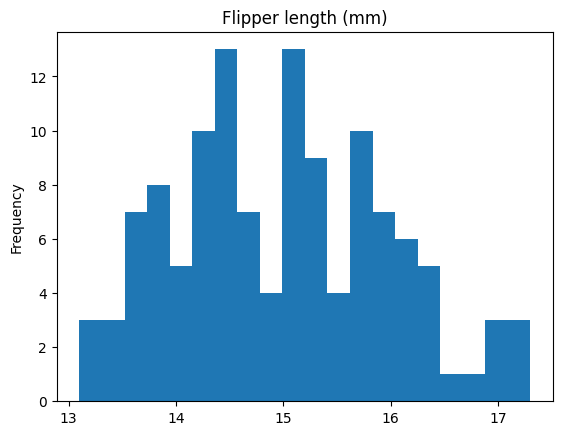

In [ ]:
plt2= penguin4['cdepth'].plot(kind='hist', bins=20, title = "Flipper length (mm)")

<Axes: title={'center': 'Weight (g)'}, ylabel='Frequency'>

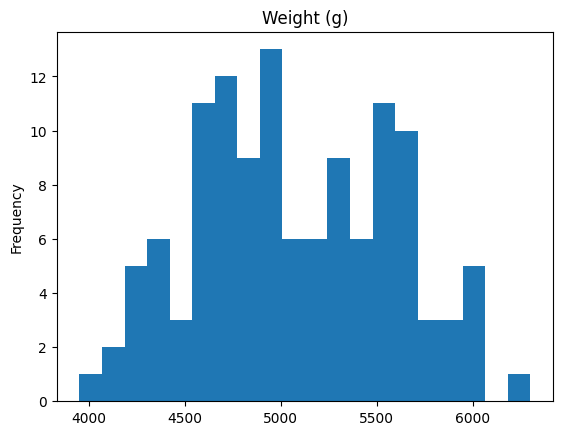

In [ ]:
penguin4['weight'].plot(kind='hist', bins=20, title = "Weight (g)")

Both flipper lengths and weight ranges appear to be within reasonable ranges.

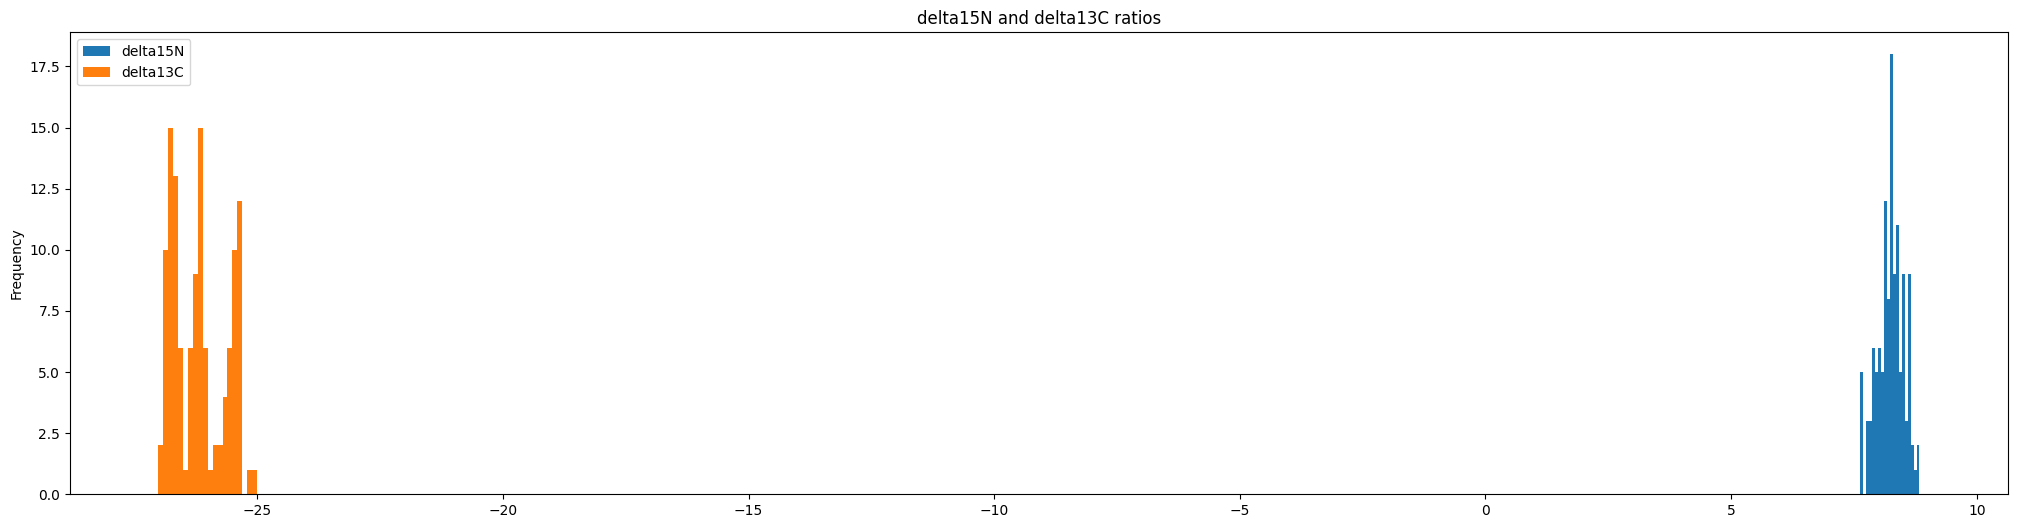

In [ ]:
plt3 = penguin4['delta15N'].plot(kind='hist', bins=20, title='delta15N and delta13C ratios', figsize=(25, 6))
penguin4['delta13C'].plot(kind='hist', bins=20)
plt3.legend()


No anomalies are found with the delta15N and delta13C ratios - however, we do observe three distinct distributions in the histogram for delta 13 C, which we will keep in mind for the unsupervised learning approach later on.

Let us further convert the eggdates to a day indicator since the earliest date in the dataset:

In [ ]:
penguin4["timedelta"] = pd.to_datetime(penguin4["eggdate"])- min(pd.to_datetime(penguin4["eggdate"]))

<ipython-input-24-1b680ffc3c79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguin4["timedelta"] = pd.to_datetime(penguin4["eggdate"])- min(pd.to_datetime(penguin4["eggdate"]))


In [ ]:
penguin4

,IID,clutch,eggdate,clength,cdepth,flength,weight,sex,delta15N,delta13C,Comments,timedelta
0,N31A1,Yes,2007-11-27,46.1,13.2,211.0,4500.0,FEMALE,7.99300,-25.51390,NaN,9 days
1,N31A2,Yes,2007-11-27,50.0,16.3,230.0,5700.0,MALE,8.14756,-25.39369,NaN,9 days
2,N32A1,Yes,2007-11-27,48.7,14.1,210.0,4450.0,FEMALE,8.14705,-25.46172,NaN,9 days
3,N32A2,Yes,2007-11-27,50.0,15.2,218.0,5700.0,MALE,8.25540,-25.40075,NaN,9 days
4,N33A1,Yes,2007-11-18,47.6,14.5,215.0,5400.0,MALE,8.23450,-25.54456,NaN,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...
118,N38A1,No,2009-12-01,47.2,13.7,214.0,4925.0,FEMALE,7.99184,-26.20538,Nest never observed with full clutch.,744 days
120,N39A1,Yes,2009-11-22,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN,735 days
121,N39A2,Yes,2009-11-22,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN,735 days
122,N43A1,Yes,2009-11-22,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN,735 days


In [ ]:
list(map(set,penguin4[["Comments"]].values.T))

[{'Nest never observed with full clutch.',
  'Sexing primers did not amplify.',
  nan}]

In [ ]:
(penguin4["Comments"])[26]

'Sexing primers did not amplify.'

In [ ]:
penguin4.iloc[26]

IID                                    N46A1
clutch                                   Yes
eggdate                           2007-11-29
clength                                 44.5
cdepth                                  14.3
flength                                216.0
weight                                4100.0
sex                                      NaN
delta15N                             7.96621
delta13C                           -25.69327
Comments     Sexing primers did not amplify.
timedelta                   11 days 00:00:00
Name: 26, dtype: object

So, we do still have nan values for sex. Let's delete those as well:

In [ ]:
list(map(set,penguin4[["sex"]].values.T))

[{'.', 'FEMALE', 'MALE', nan}]

In [ ]:
penguin5 = penguin4[penguin4["sex"].eq("MALE") | penguin4["sex"].eq("FEMALE")]

We can now drop the columns, as the only information contained is whether clutching was observed, for which we have a separate column

In [ ]:
penguin6 = penguin5.drop(["Comments"], axis=1)

In [ ]:
penguin6.head()

,IID,clutch,eggdate,clength,cdepth,flength,weight,sex,delta15N,delta13C,timedelta
0,N31A1,Yes,2007-11-27,46.1,13.2,211.0,4500.0,FEMALE,7.99300,-25.51390,9 days
1,N31A2,Yes,2007-11-27,50.0,16.3,230.0,5700.0,MALE,8.14756,-25.39369,9 days
2,N32A1,Yes,2007-11-27,48.7,14.1,210.0,4450.0,FEMALE,8.14705,-25.46172,9 days
3,N32A2,Yes,2007-11-27,50.0,15.2,218.0,5700.0,MALE,8.25540,-25.40075,9 days
4,N33A1,Yes,2007-11-18,47.6,14.5,215.0,5400.0,MALE,8.23450,-25.54456,0 days


As it might be easier for classifying the penguin later, we generate a factor from the sex column:

In [ ]:
penguin6['sex_factor'] = pd.factorize(penguin6['sex'])[0]

In [ ]:
penguin6.head()

,IID,clutch,eggdate,clength,cdepth,flength,weight,sex,delta15N,delta13C,timedelta,sex_factor
0,N31A1,Yes,2007-11-27,46.1,13.2,211.0,4500.0,FEMALE,7.99300,-25.51390,9 days,0
1,N31A2,Yes,2007-11-27,50.0,16.3,230.0,5700.0,MALE,8.14756,-25.39369,9 days,1
2,N32A1,Yes,2007-11-27,48.7,14.1,210.0,4450.0,FEMALE,8.14705,-25.46172,9 days,0
3,N32A2,Yes,2007-11-27,50.0,15.2,218.0,5700.0,MALE,8.25540,-25.40075,9 days,1
4,N33A1,Yes,2007-11-18,47.6,14.5,215.0,5400.0,MALE,8.23450,-25.54456,0 days,1


In [ ]:
penguin6["sex_factor"].describe()

count    118.000000
mean       0.508475
std        0.502060
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: sex_factor, dtype: float64

It does seem that our data set is pretty balanced in terms of female and male penguins observed (quite unsurprising, as the study was observing Gentoo breeding pairs after all). We do not have to adjust our data in view of outcome imbalance.

In [ ]:
corr_mat = penguin6[["sex_factor", "clength", "cdepth", "flength", "weight", "delta15N", "delta13C", "timedelta"]].corr()
corr_mat

,sex_factor,clength,cdepth,flength,weight,delta15N,delta13C,timedelta
sex_factor,1.000000,0.635161,0.754290,0.671556,0.806852,0.206877,0.024607,0.009391
clength,0.635161,1.000000,0.654536,0.666252,0.667265,0.131843,0.026398,0.211566
cdepth,0.754290,0.654536,1.000000,0.710618,0.722738,0.206504,-0.074694,0.251802
flength,0.671556,0.666252,0.710618,1.000000,0.711255,0.300199,-0.099557,0.212247
weight,0.806852,0.667265,0.722738,0.711255,1.000000,0.131518,0.092583,0.060811
delta15N,0.206877,0.131843,0.206504,0.300199,0.131518,1.000000,-0.586483,0.385326
delta13C,0.024607,0.026398,-0.074694,-0.099557,0.092583,-0.586483,1.000000,-0.430977
timedelta,0.009391,0.211566,0.251802,0.212247,0.060811,0.385326,-0.430977,1.000000


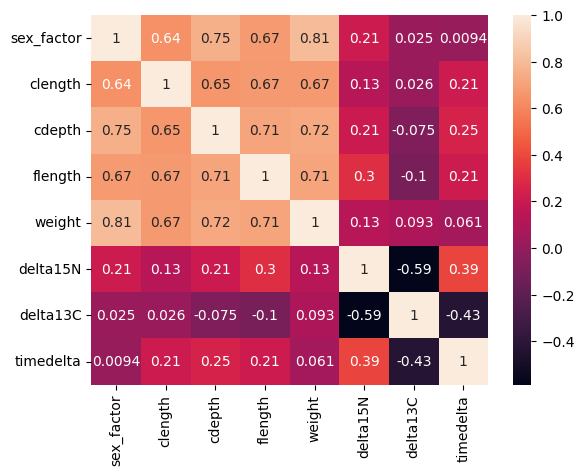

In [ ]:
ax = sns.heatmap(corr_mat, annot = True)

When looking at a correlation matrix of all our quantifiable columns, we observe a high correlation betweeen sex and culmen length, depth, flight length and weight. With Gentoo penguins, male penguins are usually larger and heavier than female penguins, so that this was to be expected. Further, we observe similar correlations betweeen any of the size/weight variables with other size/weight variables, as these factors increase in proportion to each other.
On a second glance, we do observe a weak correlation between sex and delta 15N - now that is somewhat interesting! This difference in nitrogen isotope values is used to derive dietary or migratory information (see e. g. https://pubmed.ncbi.nlm.nih.gov/17620620/, abstract). Whether it is due to the penguin's food intake, diet or metabolitic effects, we might leverage that information when training our classifiers.

There appears to be no correlation between the sex and delta 13C, and also not to the moment in time measured (after all, breeding pairs are observed!). Time might be excluded from hereon. What we do have to keep in mind is that we are carrying a lot of correlated variables, and that this might introduce collinearity.

Let us keep the final data set re-arranged and split for training/testing purposes as follows:

In [ ]:
penguin7 = penguin6[["clength", "cdepth", "flength", "weight", "delta15N", "delta13C", "sex_factor"]]

In [ ]:
penguin_train, penguin_test = train_test_split(penguin7, train_size=0.8)

# Principal component analysis



So, as a first step, let us try to visualize whether we can separate our classes using the different features:

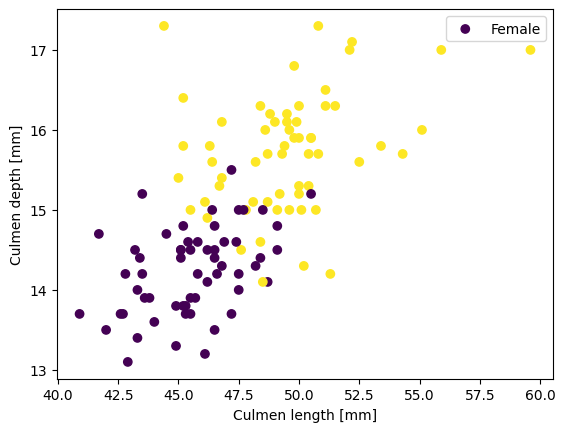

In [ ]:
plt.scatter(penguin7["clength"], penguin7["cdepth"], c=penguin7["sex_factor"])
plt.xlabel("Culmen length [mm]")
plt.ylabel("Culmen depth [mm]")
plt.legend(["Female"])

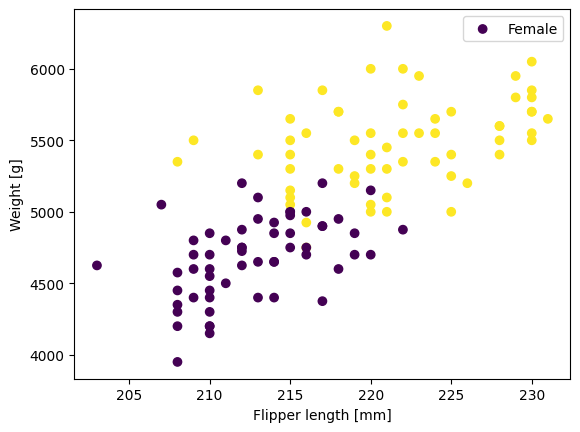

In [ ]:
plt.scatter(penguin7["flength"], penguin7["weight"], c=penguin7["sex_factor"])
plt.xlabel("Flipper length [mm]")
plt.ylabel("Weight [g]")
plt.legend(["Female"])

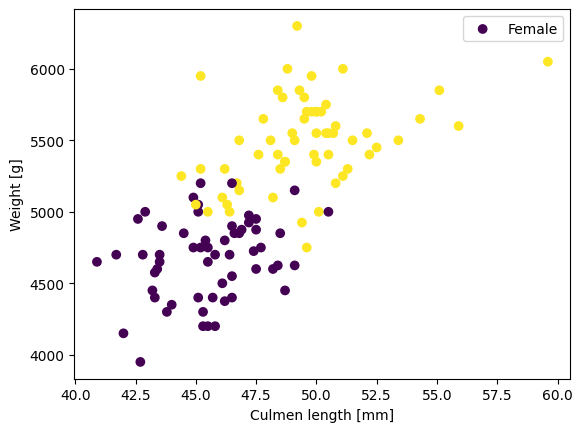

In [ ]:
plt.scatter(penguin7["clength"], penguin7["weight"], c=penguin7["sex_factor"])
plt.xlabel("Culmen length [mm]")
plt.ylabel("Weight [g]")
plt.legend(["Female"])

It does look like we could put a line through our plots to generally separate both femal and male penguins; this is a good indicator that we could reduce our features e. g. by employing prinicipal component analysis.

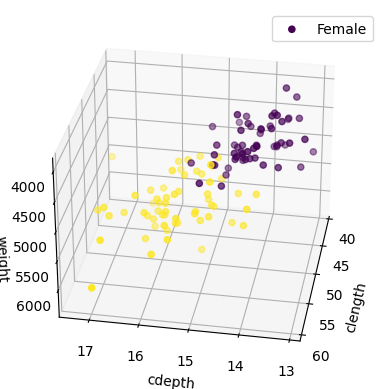

In [ ]:
ax2 = plt.axes(projection='3d', elev=-150, azim=170)
ax2.scatter3D(
    penguin7["clength"],
    penguin7["cdepth"],
    penguin7["weight"],
    c=penguin7["sex_factor"]
    )
ax2.set_xlabel('clength')
ax2.set_ylabel('cdepth')
ax2.set_zlabel('weight')
ax2.legend(["Female"])

With this 3D visualization, we do get the impression that we could easily reduce our combination of physical shapes/dimensions/weights to 1 or 2 features instead. Let's see how the eigenvectors would look like after PCA:

Knowing the distributions differ in value and dispersion for each variable, we perform scaling and PCA as learnt in Week 1:

In [ ]:
#X_reduced = PCA(n_components=2).fit_transform(penguin_train[["clength","cdepth", "flength", "weight"]])
scaling=StandardScaler()
scaling.fit(penguin_train[["clength","cdepth", "flength", "weight"]])
scaled_data=scaling.transform(penguin_train[["clength","cdepth", "flength", "weight"]])
principal=PCA(n_components = 2)
principal.fit(scaled_data)
principal_penguin =principal.transform(scaled_data)

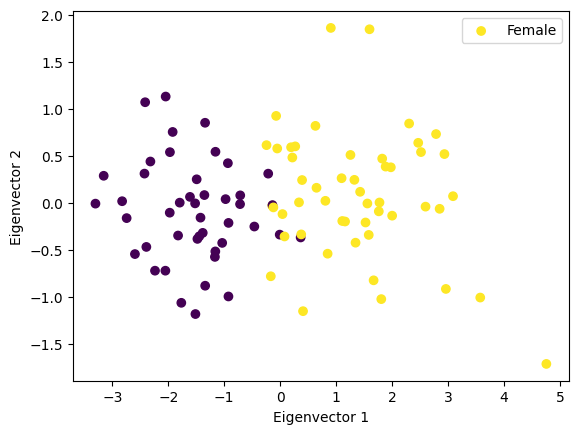

In [ ]:
plt.scatter(principal_penguin[:,0], principal_penguin[:,1], c=penguin_train['sex_factor'])
plt.xlabel("Eigenvector 1")
plt.ylabel("Eigenvector 2")
plt.legend(["Female"])

In [ ]:
#X_reduced = PCA(n_components=2).fit_transform(penguin_train[["clength","cdepth", "flength", "weight"]])
scaling=StandardScaler()
scaling.fit(penguin_train[["clength","cdepth", "flength", "weight"]])
scaled_data=scaling.transform(penguin_train[["clength","cdepth", "flength", "weight"]])
principal=PCA(n_components = 3)
principal.fit(scaled_data)
principal_penguin =principal.transform(scaled_data)

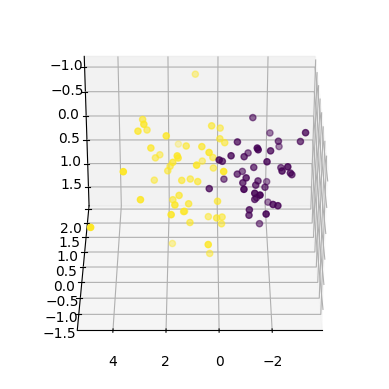

In [ ]:
ax4 = plt.axes(projection='3d', elev=-150, azim=90)
ax4.scatter3D(
    principal_penguin[:,0],
    principal_penguin[:,1],
    principal_penguin[:,2],
    c=penguin_train["sex_factor"]
    )
ax2.set_xlabel('EV1')
ax2.set_ylabel('EV2')
ax2.set_zlabel('EV3')
ax2.legend(["Female"])

In [ ]:
#X_reduced = PCA(n_components=2).fit_transform(penguin_train[["clength","cdepth", "flength", "weight"]])
scaling=StandardScaler()
scaling.fit(penguin_train[["clength","cdepth", "flength", "weight"]])
scaled_data=scaling.transform(penguin_train[["clength","cdepth", "flength", "weight"]])
principal=PCA(n_components = 1)
principal.fit(scaled_data)
principal_penguin =principal.transform(scaled_data)

Text(0, 0.5, 'Sex')

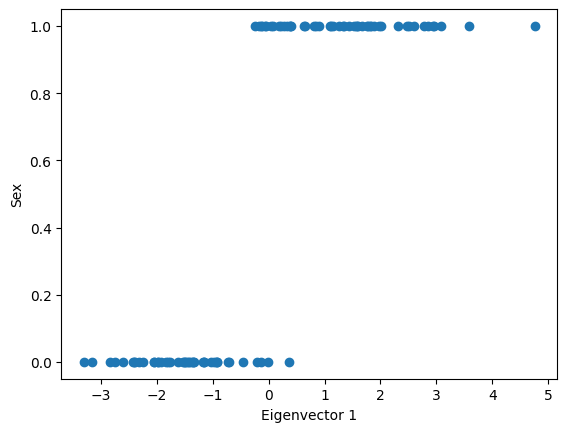

In [ ]:
plt.scatter(principal_penguin[:,0], penguin_train['sex_factor'])
plt.xlabel("Eigenvector 1")
plt.ylabel("Sex")

From the looks of it, we could even reduce all sizes and weights to one eigenvector without losing much information, if any. Only the overlap of penguins would remain (!) indistinguishable from these information alone.

In [ ]:
scaled_test = scaling.fit(penguin_test[["clength","cdepth", "flength", "weight"]])
scaled_data_test = scaling.transform(penguin_test[["clength","cdepth", "flength", "weight"]])
penguin_1D = principal.transform(scaled_data_test)

Text(0, 0.5, 'Sex')

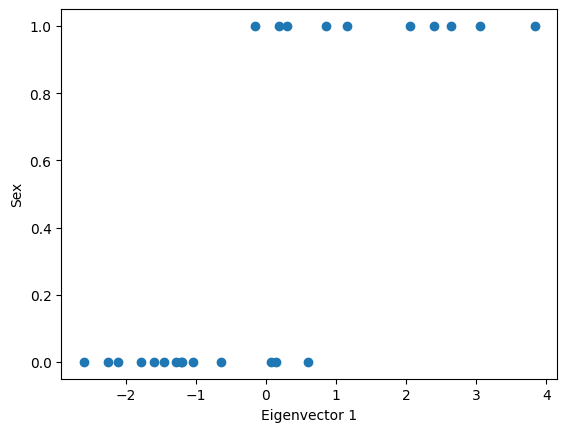

In [ ]:
plt.scatter(penguin_1D, penguin_test['sex_factor'])
plt.xlabel("Eigenvector 1")
plt.ylabel("Sex")

This also holds true for the testing data set! So let us append our EV1 from the dimensionality reductions and add it to the corresponding training/testing set! We keep our remaining features for later test purposes.

In [ ]:
penguin_train["EV1"] = principal_penguin
penguin_test["EV1"] = penguin_1D

# Clustering

Let us start with the first unsupervised learning approach. We do know that we want to predict two categories (female/male). How about using kmeans clustering with k = 2?

We split our train/test sets further so to easily 'hide' the outcome from the classifier.

In [ ]:
penguin_train_X = penguin_train.loc[:,penguin_train.columns != "sex_factor"]
penguin_train_Y = penguin_train.loc[:,penguin_train.columns == "sex_factor"]
penguin_test_X = penguin_test.loc[:,penguin_train.columns != "sex_factor"]
penguin_test_Y = penguin_test.loc[:,penguin_train.columns == "sex_factor"]

In [ ]:
KM_penguin =  KMeans(n_clusters=2, random_state=42)
KM_penguin_fit = KM_penguin.fit(penguin_train_X)
KM_penguin_pred = KM_penguin.predict(penguin_train_X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
#conf_mat_KM = confusion_matrix(penguin_train['sex_factor'], KM_penguin_pred)
#Code if it appears that we have to correct the label!
conf_mat_KM = confusion_matrix(penguin_train['sex_factor'], ((KM_penguin_pred-1)*(-1)))

<Axes: >

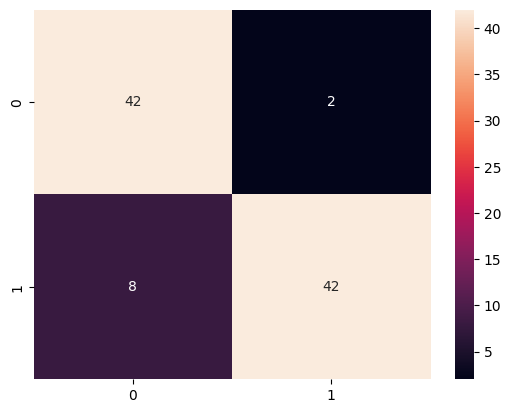

In [ ]:
sns.heatmap(conf_mat_KM, annot = True)

According to the heatmap, our naively fitted cluster using all data predicts our training data set with a slight imbalance between misclassifications of male penguins as female and vice versa.

In [ ]:
#test
ypred = ((KM_penguin_pred-1)*(-1))
accuracy_train = accuracy_score(penguin_train['sex_factor'], ypred)
recall_train = recall_score(penguin_train['sex_factor'], ypred)
precision_train = precision_score(penguin_train['sex_factor'], ypred)
print("Training:")
print("Acc: " +str(accuracy_train))
print("Recall: " +str(recall_train))
print("Precision: " +str(precision_train))

KM_penguin_pred_test = KM_penguin.predict(penguin_test_X)
confusion_matrix(penguin_test['sex_factor'], (KM_penguin_pred_test-1)*(-1))

ypred_test = ((KM_penguin_pred_test-1)*(-1))
accuracy_test = accuracy_score(penguin_test['sex_factor'], ypred_test)
recall_test = recall_score(penguin_test['sex_factor'], ypred_test)
precision_test = precision_score(penguin_test['sex_factor'], ypred_test)

print("Testing:")
print("Acc: " +str(accuracy_test))
print("Recall: " +str(recall_test))
print("Precision: " +str(precision_test))

In [ ]:
ypred = ((KM_penguin_pred-1)*(-1))
accuracy_train = accuracy_score(penguin_train['sex_factor'], ypred)
recall_train = recall_score(penguin_train['sex_factor'], ypred)
precision_train = precision_score(penguin_train['sex_factor'], ypred)

In [ ]:
print("Training:")
print("Acc: " +str(accuracy_train))
print("Recall: " +str(recall_train))
print("Precision: " +str(precision_train))

Training:
Acc: 0.8936170212765957
Recall: 0.84
Precision: 0.9545454545454546


For the testing data set, we get:

In [ ]:
KM_penguin_pred_test = KM_penguin.predict(penguin_test_X)

In [ ]:
confusion_matrix(penguin_test['sex_factor'], (KM_penguin_pred_test-1)*(-1))

array([[13,  1],
       [ 1,  9]])

In [ ]:
ypred_test = ((KM_penguin_pred_test-1)*(-1))
accuracy_test = accuracy_score(penguin_test['sex_factor'], ypred_test)
recall_test = recall_score(penguin_test['sex_factor'], ypred_test)
precision_test = precision_score(penguin_test['sex_factor'], ypred_test)

In [ ]:
print("Testing:")
print("Acc: " +str(accuracy_test))
print("Recall: " +str(recall_test))
print("Precision: " +str(precision_test))

Testing:
Acc: 0.9166666666666666
Recall: 0.9
Precision: 0.9


We certainly should be able to perform better! First off, we should optimize the number of iterations, which is by default set to 300 with sklearns KMeans

In [ ]:
KM_penguin =  KMeans(n_clusters=2, max_iter = 3000, random_state=42)
KM_penguin_fit = KM_penguin.fit(penguin_train_X)
KM_penguin_pred = KM_penguin.predict(penguin_train_X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: >

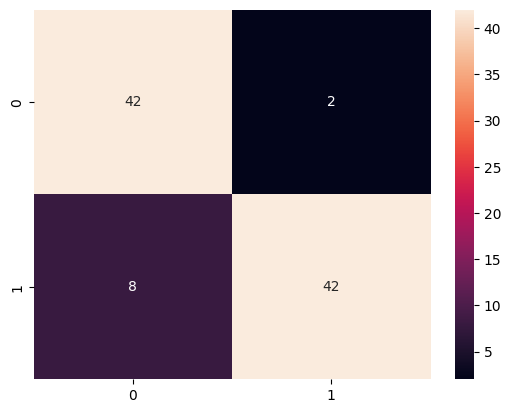

In [ ]:
conf_mat_KM = confusion_matrix(penguin_train['sex_factor'], ((KM_penguin_pred-1)*(-1)))
sns.heatmap(conf_mat_KM, annot = True)

And switching from lloyd as kmeans algorithm to elkan?

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: >

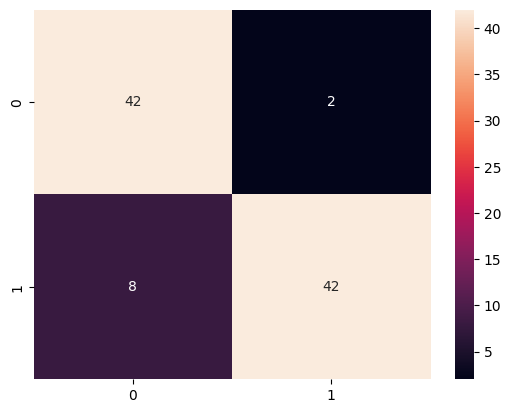

In [ ]:
KM_penguin =  KMeans(n_clusters=2, max_iter = 3000, algorithm = "elkan", random_state=42)
KM_penguin_fit = KM_penguin.fit(penguin_train_X)
KM_penguin_pred = KM_penguin.predict(penguin_train_X)
conf_mat_KM = confusion_matrix(penguin_train['sex_factor'], ((KM_penguin_pred-1)*(-1)))
sns.heatmap(conf_mat_KM, annot = True)

That did not help - it appears the algorithm is converging to the same result. If we recall, we had a certain overlap in the 4 dimensions reduced by PCA, in which the outcome was indistinguishable from said data alone. How does it look like when combined with the remaining data?

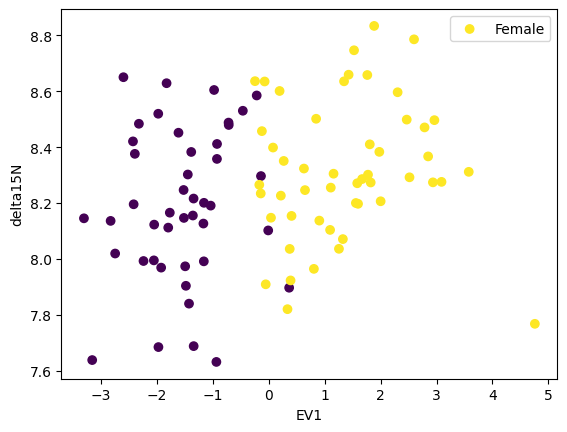

In [ ]:
plt4 = plt.scatter(penguin_train["EV1"], penguin_train["delta15N"], c=penguin_train["sex_factor"])
plt.xlabel("EV1")
plt.ylabel("delta15N")
plt.legend(["Female"])

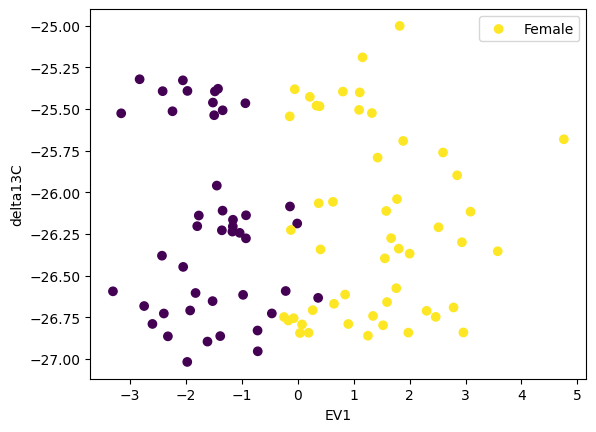

In [ ]:
plt4 = plt.scatter(penguin_train["EV1"], penguin_train["delta13C"], c=penguin_train["sex_factor"])
plt.xlabel("EV1")
plt.ylabel("delta13C")
plt.legend(["Female"])

From visual inspection, it appears that with unsupervised learning, we have reached our limits here - neither delta value allows us to visually separate female from male penguins in the training data set, so we would not assume for clustering to give us another result! However, for the sake of this argument, we can also try to replicate the result with AgglomerativeClustering!

In [ ]:
AC_penguin =  AgglomerativeClustering(n_clusters=2)
AC_penguin_fit = AC_penguin.fit(penguin_train_X)


[Text(0.5, 1.0, 'Linkage: Ward')]

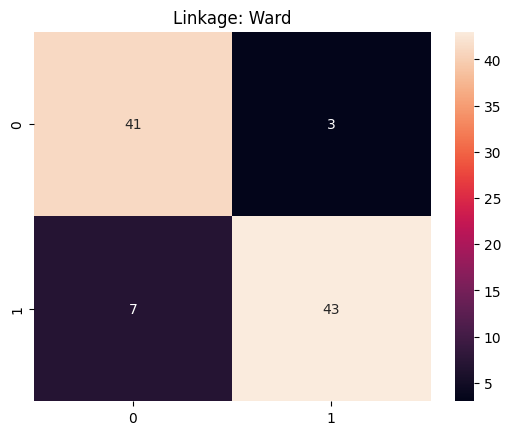

In [ ]:
AC_penguin_pred = AC_penguin_fit.labels_
conf_mat_AC = confusion_matrix(penguin_train['sex_factor'], ((AC_penguin_pred)))
sns.heatmap(conf_mat_AC, annot = True).set(title ="Linkage: Ward")

[Text(0.5, 1.0, 'Linkage: Ward')]

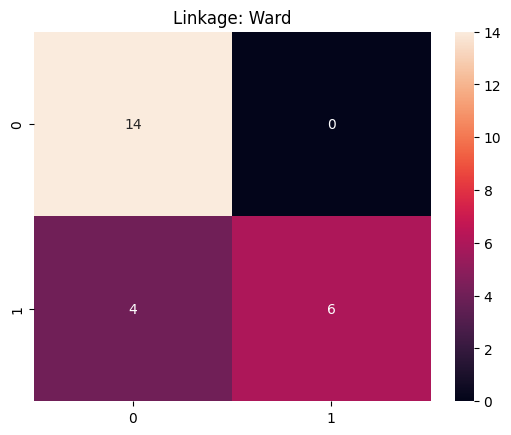

In [ ]:
AC_penguin_fit_test = AC_penguin.fit(penguin_test_X)
AC_penguin_pred_test = AC_penguin_fit_test.labels_
conf_mat_AC_test = confusion_matrix(penguin_test['sex_factor'], ((AC_penguin_pred_test)))
sns.heatmap(conf_mat_AC_test, annot = True).set(title ="Linkage: Ward")

So, naively performing Agglomerative Clustering results in the same test confusion matrix (and a slightly different training matrix, biased towards misclassifying male penguins as females). How about different linkage types?

[Text(0.5, 1.0, 'Linkage: Complete')]

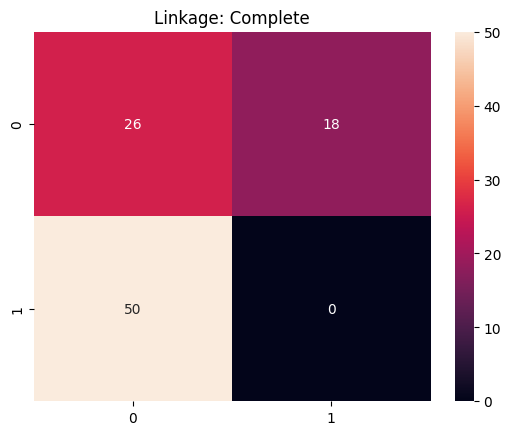

In [ ]:
AC_penguin_c =  AgglomerativeClustering(n_clusters=2, linkage = "complete") #{‘ward’, ‘complete’, ‘average’, ‘single’})
AC_penguin_fit_c = AC_penguin_c.fit(penguin_train_X)
AC_penguin_pred_c = AC_penguin_fit_c.labels_
conf_mat_AC_c = confusion_matrix(penguin_train['sex_factor'], ((AC_penguin_pred_c)))
sns.heatmap(conf_mat_AC_c, annot = True).set(title ="Linkage: Complete")

Well, the accuracy clearly decreases!

[Text(0.5, 1.0, 'Linkage: Average')]

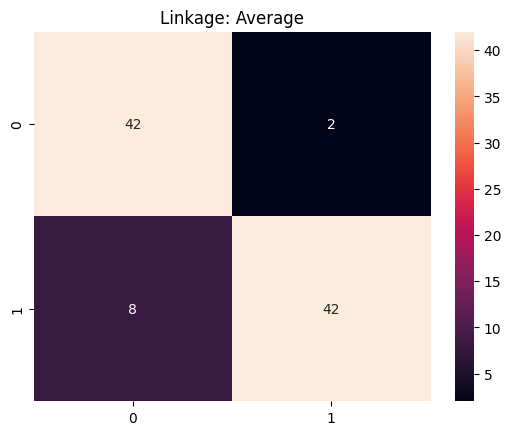

In [ ]:
AC_penguin_a =  AgglomerativeClustering(n_clusters=2, linkage = "average") #{‘ward’, ‘complete’, ‘average’, ‘single’})
AC_penguin_fit_a = AC_penguin_a.fit(penguin_train_X)
AC_penguin_pred_a = AC_penguin_fit_a.labels_
conf_mat_AC_a = confusion_matrix(penguin_train['sex_factor'], ((-1)*(AC_penguin_pred_a-1)))
sns.heatmap(conf_mat_AC_a, annot = True).set(title ="Linkage: Average")

We achieve the same best accuracy as with all other clustering methods before.

[Text(0.5, 1.0, 'Linkage: single')]

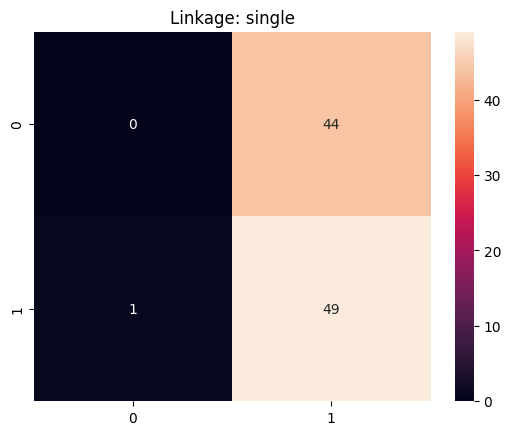

In [ ]:
AC_penguin_s =  AgglomerativeClustering(n_clusters=2, linkage = "single") #{‘ward’, ‘complete’, ‘average’, ‘single’})
AC_penguin_fit_s = AC_penguin_s.fit(penguin_train_X)
AC_penguin_pred_s = AC_penguin_fit_s.labels_
conf_mat_AC_s = confusion_matrix(penguin_train['sex_factor'], ((-1)*(AC_penguin_pred_s-1)))
sns.heatmap(conf_mat_AC_s, annot = True).set(title ="Linkage: single")

And using single linkage clearly does not work, as it classifies every single penguin (expect 1) as male.

We could further optimize parameters or even start artificially increasing k and projecting the results back to the classification of female/male - but this would merely result in some form of overfitting.

What we still have to prove is that our dimensionality reduction worked well enough - currently, we are clustering on all data. Let's proof it:

In [ ]:
penguin_train_X

,clength,cdepth,flength,weight,delta15N,delta13C,EV1
65,49.8,16.8,230.0,5700.0,8.47067,-26.69166,2.786307
4,47.6,14.5,215.0,5400.0,8.23450,-25.54456,-0.142378
11,49.0,16.1,216.0,5550.0,8.10417,-25.50562,1.097388
28,48.2,14.3,210.0,4600.0,7.68870,-25.50811,-1.341554
70,47.7,15.0,216.0,4750.0,8.53018,-26.72751,-0.462506
...,...,...,...,...,...,...,...
27,47.8,15.0,215.0,5650.0,7.92358,-25.48383,0.390765
113,51.5,16.3,230.0,5500.0,8.78557,-25.76147,2.598054
18,46.2,14.5,209.0,4800.0,7.84057,-25.37899,-1.424817
74,46.4,15.0,216.0,4700.0,8.47938,-26.95470,-0.714516


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: >

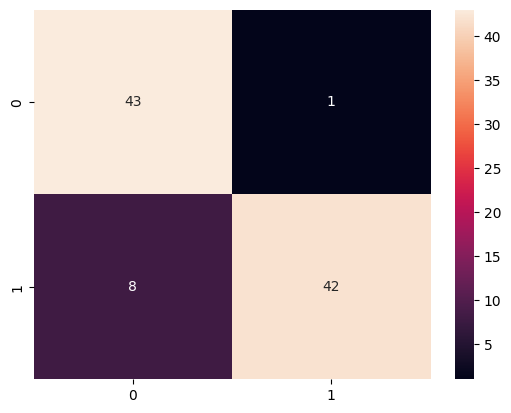

In [ ]:
KM_penguin =  KMeans(n_clusters=2, max_iter = 3000, algorithm = "elkan", random_state=42)
KM_penguin_fit = KM_penguin.fit(penguin_train_X[["EV1","delta13C"]])
KM_penguin_pred = KM_penguin.predict(penguin_train_X[["EV1","delta13C"]])
conf_mat_KM = confusion_matrix(penguin_train['sex_factor'], ((KM_penguin_pred-1)*(-1)))
sns.heatmap(conf_mat_KM, annot = True)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: >

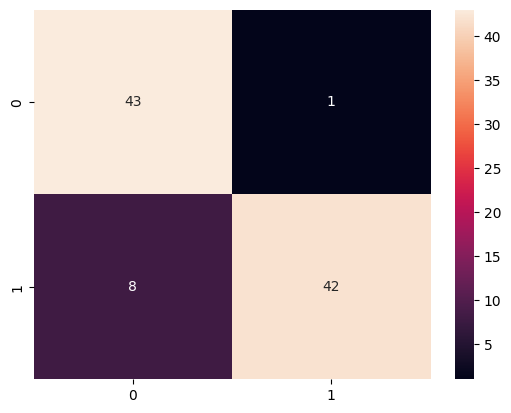

In [ ]:
KM_penguin =  KMeans(n_clusters=2, max_iter = 3000, algorithm = "elkan", random_state=42)
KM_penguin_fit = KM_penguin.fit(penguin_train_X[["EV1"]])
KM_penguin_pred = KM_penguin.predict(penguin_train_X[["EV1"]])
conf_mat_KM = confusion_matrix(penguin_train['sex_factor'], ((KM_penguin_pred-1)*(-1)))
sns.heatmap(conf_mat_KM, annot = True)

In [ ]:
#Results for EV1
ypred = ((KM_penguin_pred-1)*(-1))
accuracy_train = accuracy_score(penguin_train['sex_factor'], ypred)
recall_train = recall_score(penguin_train['sex_factor'], ypred)
precision_train = precision_score(penguin_train['sex_factor'], ypred)
print("Training:")
print("Acc: " +str(accuracy_train))
print("Recall: " +str(recall_train))
print("Precision: " +str(precision_train))

KM_penguin_pred_test = KM_penguin.predict(penguin_test_X[["EV1"]])
print(confusion_matrix(penguin_test['sex_factor'], (KM_penguin_pred_test-1)*(-1)))

ypred_test = ((KM_penguin_pred_test-1)*(-1))
accuracy_test = accuracy_score(penguin_test['sex_factor'], ypred_test)
recall_test = recall_score(penguin_test['sex_factor'], ypred_test)
precision_test = precision_score(penguin_test['sex_factor'], ypred_test)

print("Testing:")
print("Acc: " +str(accuracy_test))
print("Recall: " +str(recall_test))
print("Precision: " +str(precision_test))

Training:
Acc: 0.9042553191489362
Recall: 0.84
Precision: 0.9767441860465116
[[12  2]
 [ 1  9]]
Testing:
Acc: 0.875
Recall: 0.9
Precision: 0.8181818181818182


So, as seen above, we reach similar (slightly better train, slightly worse testing accuracy) results compared with the initial kMeans only with our sole eigenvector reduced from the 4 dimensions ("clength","cdepth", "flength", "weight").

In summary, we will try to see whether we can perform better with supervised learning to beat the results of KMean clustering performed only on the Eigenvector of the PCA.


# Non-negative matrix factorization

Before proceeding to the comparison, could we maybe find another technique to better predict female/male penguins? How about using non-negative matrix factorization? Can we even do that in view of one of our values being negative? (It is a bad idea, but why?)

In [ ]:
print(penguin_train_X["delta13C"].describe())

count    94.000000
mean    -26.206161
std       0.543903
min     -27.018540
25%     -26.709218
50%     -26.259710
75%     -25.684562
max     -25.001690
Name: delta13C, dtype: float64


Well, since it is only negative, we could take its absolute value! But we have to let go of our eigenvalue for this exercise, which is not a great loss - we hope to find some so far yet to be uncovered systematic in all variables.

In [ ]:
penguin_train_Xn = penguin_train_X
penguin_test_Xn = penguin_test_X
penguin_train_Xn["minusdelta13C"] = -penguin_train_X["delta13C"]
penguin_test_Xn["minusdelta13C"] = -penguin_test_X["delta13C"]
penguin_train_Xn = penguin_train_Xn.drop(["EV1", "delta13C"], axis=1)
penguin_test_Xn = penguin_test_Xn.drop(["EV1", "delta13C"], axis=1)
print(penguin_test_Xn.head())

     clength  cdepth  flength  weight  delta15N  minusdelta13C
20      50.2    14.3    218.0  5700.0   7.89620       25.37746
14      45.8    14.6    210.0  4200.0   7.79958       25.62618
115     55.1    16.0    230.0  5850.0   8.08354       26.18161
12      45.5    13.7    214.0  4650.0   7.77672       25.41680
86      43.4    14.4    218.0  4600.0   8.23468       26.18599


Let's start with a naively trained model, defining only the number of components and the beta_loss as frobenius:

In [ ]:
nmf1 = NMF(
    n_components=2,
    beta_loss="frobenius",
    max_iter = 20000
).fit(penguin_train_Xn)

In [ ]:
nmf1.transform(penguin_train_Xn).argmax(axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

Oh, wait a minute - that is not good at all. Why is this happening? We do not have sparse matrices contained in our data set - in fact, the training data has a sparsity of approx. 0. We cannot perform NMF on such a matrix.

# New techniques

Well, is it time to give up and call it a day? We have exhausted most of the techniques presented in class suitable for this dataset. What about other techiques?

One would be another form of clustering: So far, we have used KMeans and AgglomerativeClustering, the former not suited and the latter not optimal for non-flat geometries. Maybe we can expect more from another clustering algorithm, such as SpecralClustering, which is suitable for small numbers of clusters and provides for non-flat geometries?

In [ ]:
penguin_train_X

,clength,cdepth,flength,weight,delta15N,delta13C,EV1,minusdelta13C
65,49.8,16.8,230.0,5700.0,8.47067,-26.69166,2.786307,26.69166
4,47.6,14.5,215.0,5400.0,8.23450,-25.54456,-0.142378,25.54456
11,49.0,16.1,216.0,5550.0,8.10417,-25.50562,1.097388,25.50562
28,48.2,14.3,210.0,4600.0,7.68870,-25.50811,-1.341554,25.50811
70,47.7,15.0,216.0,4750.0,8.53018,-26.72751,-0.462506,26.72751
...,...,...,...,...,...,...,...,...
27,47.8,15.0,215.0,5650.0,7.92358,-25.48383,0.390765,25.48383
113,51.5,16.3,230.0,5500.0,8.78557,-25.76147,2.598054,25.76147
18,46.2,14.5,209.0,4800.0,7.84057,-25.37899,-1.424817,25.37899
74,46.4,15.0,216.0,4700.0,8.47938,-26.95470,-0.714516,26.95470


In [ ]:
from sklearn.cluster import SpectralClustering

In [ ]:
penguin_spect = SpectralClustering(n_clusters = 2, random_state = 42)
penguin_spect_fit = penguin_spect.fit_predict(penguin_train_X[["EV1", 	"delta15N", 	"delta13C"]])

In [ ]:
penguin_spect_fit

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1], dtype=int32)

<Axes: >

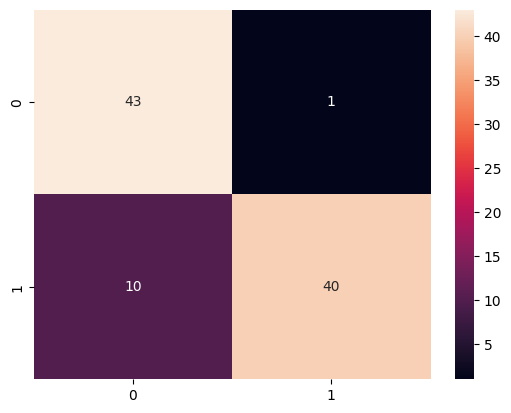

In [ ]:
conf_mat_spect = confusion_matrix(penguin_train['sex_factor'], ((penguin_spect_fit)*(1)))
sns.heatmap(conf_mat_spect, annot = True)

So, out of the box, we receive worse results on the training data. Let us tune the parameters, first by using cluster_qr instead of kmeans for assigning labels:

<Axes: >

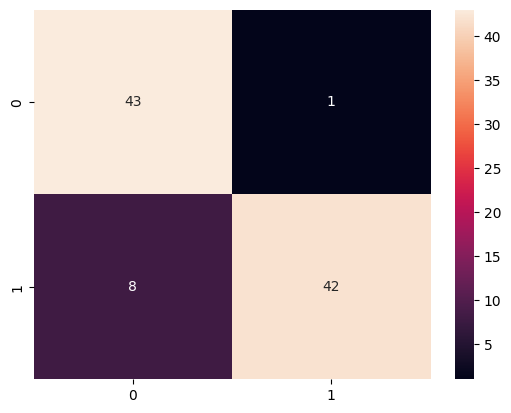

In [ ]:
penguin_spect = SpectralClustering(n_clusters = 2, random_state = 42, assign_labels = "cluster_qr")
penguin_spect_fit = penguin_spect.fit_predict(penguin_train_X[["EV1","delta13C"]])
conf_mat_spect = confusion_matrix(penguin_train['sex_factor'], ((penguin_spect_fit-1)*(-1)))
sns.heatmap(conf_mat_spect, annot = True)

Now we are being on par with kMeans again. But what if we introduced a nearest neighbour affinity?

<Axes: >

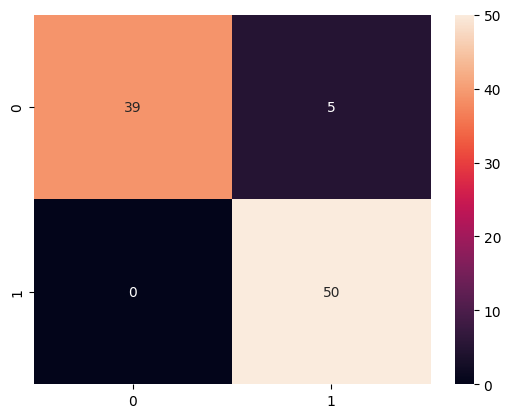

In [ ]:
penguin_spect = SpectralClustering(n_clusters = 2, random_state = 42, assign_labels = "cluster_qr", affinity = "nearest_neighbors")
penguin_spect_fit = penguin_spect.fit_predict(penguin_train_X[["EV1","delta13C"]])
conf_mat_spect = confusion_matrix(penguin_train['sex_factor'], ((penguin_spect_fit)*(1)))
sns.heatmap(conf_mat_spect, annot = True)

And with some fine-tuning of the numbers of nearest neighbours to look at, we arrive at:

<Axes: >

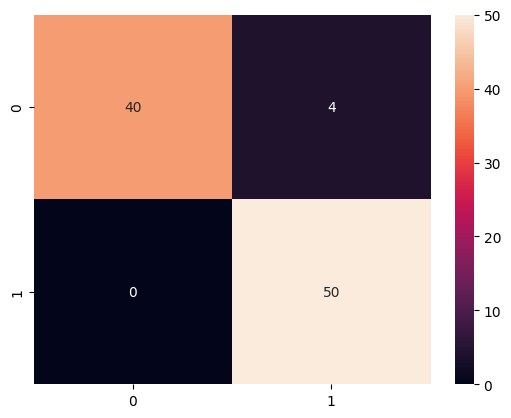

In [ ]:
penguin_spect = SpectralClustering(n_clusters = 2, random_state = 42, assign_labels = "cluster_qr", affinity = "nearest_neighbors", n_neighbors = 15)
penguin_spect_fit = penguin_spect.fit_predict(penguin_train_X[["EV1","delta13C"]])
conf_mat_spect = confusion_matrix(penguin_train['sex_factor'], ((penguin_spect_fit)*(1)))
sns.heatmap(conf_mat_spect, annot = True)

That looks promising. What are the scores for the training data set - and more importantly, how does this clustering perform on the testing data?

In [ ]:
#Results for Spectral Clustering
ypred_spect = ((penguin_spect_fit)*(1))
accuracy_train = accuracy_score(penguin_train['sex_factor'], ypred_spect)
recall_train = recall_score(penguin_train['sex_factor'], ypred_spect)
precision_train = precision_score(penguin_train['sex_factor'], ypred_spect)
print("Training:")
print("Acc: " +str(accuracy_train))
print("Recall: " +str(recall_train))
print("Precision: " +str(precision_train))

penguin_spect_test = SpectralClustering(n_clusters = 2, random_state = 42, assign_labels = "cluster_qr", affinity = "nearest_neighbors", n_neighbors = 15)
penguin_spect_test_fit = penguin_spect_test.fit_predict(penguin_test_X[["EV1","delta13C"]])

print(confusion_matrix(penguin_test['sex_factor'], (penguin_spect_test_fit-1)*(-1)))

ypred_test_spect = ((penguin_spect_test_fit-1)*(-1))
accuracy_test = accuracy_score(penguin_test['sex_factor'], ypred_test_spect)
recall_test = recall_score(penguin_test['sex_factor'], ypred_test_spect)
precision_test = precision_score(penguin_test['sex_factor'], ypred_test_spect)

print("Testing:")
print("Acc: " +str(accuracy_test))
print("Recall: " +str(recall_test))
print("Precision: " +str(precision_test))

Training:
Acc: 0.9574468085106383
Recall: 1.0
Precision: 0.9259259259259259
[[13  1]
 [ 1  9]]
Testing:
Acc: 0.9166666666666666
Recall: 0.9
Precision: 0.9


And now dropping the delta 13 C predictor:

Training:
Acc: 0.9574468085106383
Recall: 1.0
Precision: 0.9259259259259259
[[13  1]
 [ 2  8]]
Testing:
Acc: 0.875
Recall: 0.8
Precision: 0.8888888888888888


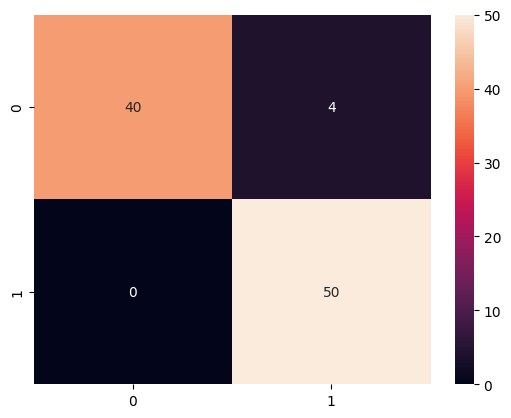

In [ ]:
penguin_spect = SpectralClustering(n_clusters = 2, random_state = 42, assign_labels = "cluster_qr", affinity = "nearest_neighbors", n_neighbors = 15)
penguin_spect_fit = penguin_spect.fit_predict(penguin_train_X[["EV1"]])
conf_mat_spect = confusion_matrix(penguin_train['sex_factor'], ((penguin_spect_fit)*(1)))
sns.heatmap(conf_mat_spect, annot = True)

#Results for Spectral Clustering
ypred_spect = ((penguin_spect_fit)*(1))
accuracy_train = accuracy_score(penguin_train['sex_factor'], ypred_spect)
recall_train = recall_score(penguin_train['sex_factor'], ypred_spect)
precision_train = precision_score(penguin_train['sex_factor'], ypred_spect)
print("Training:")
print("Acc: " +str(accuracy_train))
print("Recall: " +str(recall_train))
print("Precision: " +str(precision_train))

penguin_spect_test = SpectralClustering(n_clusters = 2, random_state = 42, assign_labels = "cluster_qr", affinity = "nearest_neighbors", n_neighbors = 15)
penguin_spect_test_fit = penguin_spect_test.fit_predict(penguin_test_X[["EV1"]])

print(confusion_matrix(penguin_test['sex_factor'], (penguin_spect_test_fit-1)*(-1)))

ypred_test_spect = ((penguin_spect_test_fit-1)*(-1))
accuracy_test = accuracy_score(penguin_test['sex_factor'], ypred_test_spect)
recall_test = recall_score(penguin_test['sex_factor'], ypred_test_spect)
precision_test = precision_score(penguin_test['sex_factor'], ypred_test_spect)

print("Testing:")
print("Acc: " +str(accuracy_test))
print("Recall: " +str(recall_test))
print("Precision: " +str(precision_test))

These are nice results - compared to the other techniques, we can predict with an accuracy of almost 96% on the training and close to 92% percent on the testing data set!

# Supervised Learning

For the comparison, we have to choose a reasonable ML model. In view of the balanced data set with a lot of collinearity issues, we should either construct a model from scratch that statistically holds water in view of each predictor assigned to that model - or we use a Random Forest which subsamples the dataset and counters overfitting.

## Random Forest Classifier

,clength,cdepth,flength,weight,delta15N,delta13C,EV1,minusdelta13C
65,49.8,16.8,230.0,5700.0,8.47067,-26.69166,2.786307,26.69166
4,47.6,14.5,215.0,5400.0,8.23450,-25.54456,-0.142378,25.54456
11,49.0,16.1,216.0,5550.0,8.10417,-25.50562,1.097388,25.50562
28,48.2,14.3,210.0,4600.0,7.68870,-25.50811,-1.341554,25.50811
70,47.7,15.0,216.0,4750.0,8.53018,-26.72751,-0.462506,26.72751
...,...,...,...,...,...,...,...,...
27,47.8,15.0,215.0,5650.0,7.92358,-25.48383,0.390765,25.48383
113,51.5,16.3,230.0,5500.0,8.78557,-25.76147,2.598054,25.76147
18,46.2,14.5,209.0,4800.0,7.84057,-25.37899,-1.424817,25.37899
74,46.4,15.0,216.0,4700.0,8.47938,-26.95470,-0.714516,26.95470


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
penguin_RF = RandomForestClassifier(, random_state = 42)
penguin_RF_fit = penguin_RF.fit(penguin_train_X[["clength", "cdepth", 	"flength", 	"weight", 	"delta15N", 	"delta13C"]], penguin_train_Y["sex_factor"])

In [ ]:
penguin_RF_pred = penguin_RF.predict(penguin_train_X[["clength", "cdepth", 	"flength", 	"weight", 	"delta15N", 	"delta13C"]])
penguin_RF_pred_test = penguin_RF.predict(penguin_test_X[["clength", "cdepth", 	"flength", 	"weight", 	"delta15N", 	"delta13C"]])

In [ ]:
penguin_RF_pred

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1])

In [ ]:
accuracy_train_RF = accuracy_score(penguin_train['sex_factor'], penguin_RF_pred)
recall_train_RF = recall_score(penguin_train['sex_factor'], penguin_RF_pred)
precision_train_RF = precision_score(penguin_train['sex_factor'], penguin_RF_pred)
accuracy_train_RF_test = accuracy_score(penguin_test['sex_factor'], penguin_RF_pred_test)
recall_train_RF_test = recall_score(penguin_test['sex_factor'], penguin_RF_pred_test)
precision_train_RF_test = precision_score(penguin_test['sex_factor'], penguin_RF_pred_test)
print("Training:")
print("Acc: " +str(accuracy_train_RF))
print("Recall: " +str(recall_train_RF))
print("Precision: " +str(precision_train_RF))
print("Test:")
print("Acc: " +str(accuracy_train_RF_test))
print("Recall: " +str(recall_train_RF_test))
print("Precision: " +str(precision_train_RF_test))

Training:
Acc: 1.0
Recall: 1.0
Precision: 1.0
Test:
Acc: 0.9583333333333334
Recall: 1.0
Precision: 0.9090909090909091


Without further (hyper)parameter tuning, we arrive at a training accuracy of 1 - and a testing accuracy of almost 96%! Since we are limited by the testing data set (it is quite small, and we already have only 1 misclassified penguin remaining!), we can only try (and possibly fail) to further tune e. g. anticipating overfitting.

In [ ]:
acc_train_arr = []
acc_test_arr = []
n_estimator_array = [50, 80, 100, 110, 150, 200, 500, 750, 1000]
for est in n_estimator_array:
  penguin_RF = RandomForestClassifier(n_estimators = est, random_state = 42)
  penguin_RF_fit = penguin_RF.fit(penguin_train_X[["clength", "cdepth", 	"flength", 	"weight", 	"delta15N", 	"delta13C"]], penguin_train_Y["sex_factor"])
  penguin_RF_pred = penguin_RF.predict(penguin_train_X[["clength", "cdepth", 	"flength", 	"weight", 	"delta15N", 	"delta13C"]])
  penguin_RF_pred_test = penguin_RF.predict(penguin_test_X[["clength", "cdepth", 	"flength", 	"weight", 	"delta15N", 	"delta13C"]])
  accuracy_train_RF = accuracy_score(penguin_train['sex_factor'], penguin_RF_pred)
  # recall_train_RF = recall_score(penguin_train['sex_factor'], penguin_RF_pred)
  # precision_train_RF = precision_score(penguin_train['sex_factor'], penguin_RF_pred)
  accuracy_train_RF_test = accuracy_score(penguin_test['sex_factor'], penguin_RF_pred_test)
  # recall_train_RF_test = recall_score(penguin_test['sex_factor'], penguin_RF_pred_test)
  # precision_train_RF_test = precision_score(penguin_test['sex_factor'], penguin_RF_pred_test)
  acc_train_arr.append(accuracy_train_RF)
  acc_test_arr.append(accuracy_train_RF_test)
# print("Training:")
# print("Acc: " +str(accuracy_train_RF))
# print("Recall: " +str(recall_train_RF))
# print("Precision: " +str(precision_train_RF))
# print("Test:")
# print("Acc: " +str(accuracy_train_RF_test))
# print("Recall: " +str(recall_train_RF_test))
# print("Precision: " +str(precision_train_RF_test))

Text(0, 0.5, 'Accuracy')

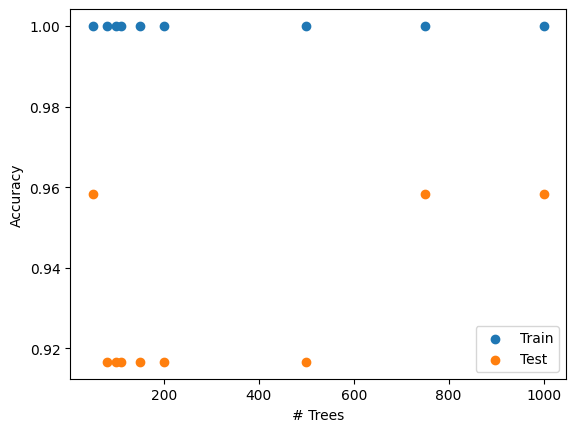

In [ ]:
fig, ax = plt.subplots()
plt.scatter(n_estimator_array, acc_train_arr)
plt.scatter(n_estimator_array, acc_test_arr)
ax.legend(["Train", "Test"])
plt.xlabel("# Trees")
plt.ylabel("Accuracy")

We can see that we oscillate between 1 and 2 misclassified examples.

In [ ]:
acc_train_arr = []
acc_test_arr = []
max_depth_array = [1, 2,3,4,5,6,7,8,9,10]
for depth in max_depth_array:
  penguin_RF = RandomForestClassifier(n_estimators = 1000, max_depth = depth, random_state = 42)
  penguin_RF_fit = penguin_RF.fit(penguin_train_X[["clength", "cdepth", 	"flength", 	"weight", 	"delta15N", 	"delta13C"]], penguin_train_Y["sex_factor"])
  penguin_RF_pred = penguin_RF.predict(penguin_train_X[["clength", "cdepth", 	"flength", 	"weight", 	"delta15N", 	"delta13C"]])
  penguin_RF_pred_test = penguin_RF.predict(penguin_test_X[["clength", "cdepth", 	"flength", 	"weight", 	"delta15N", 	"delta13C"]])
  accuracy_train_RF = accuracy_score(penguin_train['sex_factor'], penguin_RF_pred)
  accuracy_train_RF_test = accuracy_score(penguin_test['sex_factor'], penguin_RF_pred_test)
  acc_train_arr.append(accuracy_train_RF)
  acc_test_arr.append(accuracy_train_RF_test)


Text(0, 0.5, 'Accuracy')

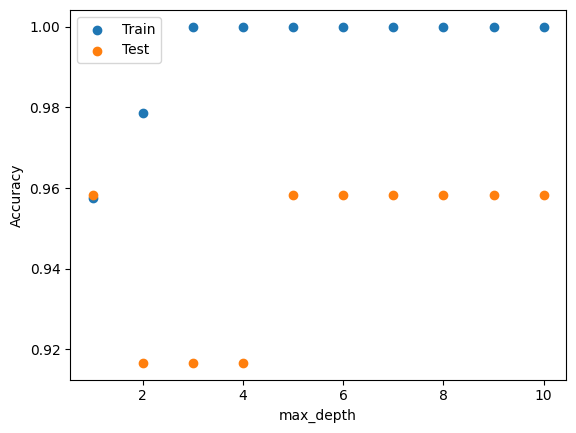

In [ ]:
fig, ax = plt.subplots()
plt.scatter(max_depth_array, acc_train_arr)
plt.scatter(max_depth_array, acc_test_arr)
ax.legend(["Train", "Test"])
plt.xlabel("max_depth")
plt.ylabel("Accuracy")

In [ ]:
acc_train_arr = []
acc_test_arr = []
min_samples_leaf = [1, 2,3,4,5,6,7,8,9,10]
for leaf in min_samples_leaf:
  penguin_RF = RandomForestClassifier(n_estimators = 1000, max_depth = 5, min_samples_leaf = leaf, random_state = 42)
  penguin_RF_fit = penguin_RF.fit(penguin_train_X[["clength", "cdepth", 	"flength", 	"weight", 	"delta15N", 	"delta13C"]], penguin_train_Y["sex_factor"])
  penguin_RF_pred = penguin_RF.predict(penguin_train_X[["clength", "cdepth", 	"flength", 	"weight", 	"delta15N", 	"delta13C"]])
  penguin_RF_pred_test = penguin_RF.predict(penguin_test_X[["clength", "cdepth", 	"flength", 	"weight", 	"delta15N", 	"delta13C"]])
  accuracy_train_RF = accuracy_score(penguin_train['sex_factor'], penguin_RF_pred)
  accuracy_train_RF_test = accuracy_score(penguin_test['sex_factor'], penguin_RF_pred_test)
  acc_train_arr.append(accuracy_train_RF)
  acc_test_arr.append(accuracy_train_RF_test)


Text(0, 0.5, 'Accuracy')

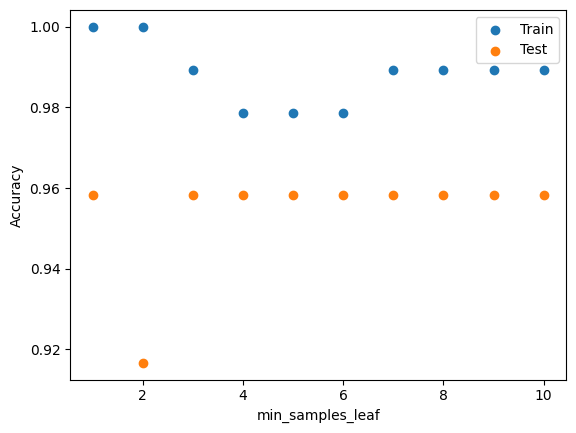

In [ ]:
fig, ax = plt.subplots()
plt.scatter(min_samples_leaf, acc_train_arr)
plt.scatter(min_samples_leaf, acc_test_arr)
ax.legend(["Train", "Test"])
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")

The best testing accuracy remains steadil at just below 96%, independent of the parameters chosen. We could continue checking all paramaters, possibly even starting cost-complexity pruning of the tree - for one (!) misclassified point in an already small dataset. As such, we will stop here and quickly look at GAMs for statistical analysis.

## GAMs

Generalized additive models are a good way to quickly check statistical significant contributions of predictors to a model. In our case, we resort to a LogisticGAM, keeping in mind that we have a binary classification problem at hand.

In [ ]:
!pip install pygam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 5.5 MB/s eta 0:00:00


In [ ]:
from pygam.pygam import LogisticGAM
from pygam import s, f, l

In [ ]:
penguin_train_X[["clength", "cdepth", 	"flength", 	"weight", 	"delta15N", 	"delta13C", "EV1"]].head()

,clength,cdepth,flength,weight,delta15N,delta13C,EV1
65,49.8,16.8,230.0,5700.0,8.47067,-26.69166,2.786307
4,47.6,14.5,215.0,5400.0,8.23450,-25.54456,-0.142378
11,49.0,16.1,216.0,5550.0,8.10417,-25.50562,1.097388
28,48.2,14.3,210.0,4600.0,7.68870,-25.50811,-1.341554
70,47.7,15.0,216.0,4750.0,8.53018,-26.72751,-0.462506


We do need to decide whether a (potential) predictor is contributing linearily or with a smoothing function to the prediction. As such, we have to hand LogisticGAM indications in order of their appearance in the Dataframe as visible above. We start under the assumption that nothing is simply linearily correlated:

In [ ]:
penguin_GAM = LogisticGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6)).fit(penguin_train_X[["clength", "cdepth", 	"flength", 	"weight", 	"delta15N", 	"delta13C", "EV1"]], penguin_train_Y["sex_factor"])

did not converge


Increasing the number of iterations to achieve convergence (standard is 100):

In [ ]:
penguin_GAM = LogisticGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6), max_iter = 10000).fit(penguin_train_X[["clength", "cdepth", 	"flength", 	"weight", 	"delta15N", 	"delta13C", "EV1"]], penguin_train_Y["sex_factor"])

did not converge


We cannot achieve convergence with a reasonable number of iterations. With some domain knowledge, we start dropping feature by feature until the LogisticGAm converges:

In [ ]:
penguin_GAM = LogisticGAM(s(0) + s(1) + s(2) + s(3), max_iter = 1000).fit(penguin_train_X[["weight", 	"delta15N", 	"delta13C", "EV1"]], penguin_train_Y["sex_factor"])

/usr/local/lib/python3.10/dist-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in divide
  return dist.levels / (mu * (dist.levels - mu))
/usr/local/lib/python3.10/dist-packages/pygam/pygam.py:627: RuntimeWarning: invalid value encountered in multiply
  self.link.gradient(mu, self.distribution) ** 2


did not converge


In [ ]:
penguin_GAM = LogisticGAM(s(0) + s(1) + s(2), max_iter = 1000).fit(penguin_train_X[["delta15N", 	"delta13C", "EV1"]], penguin_train_Y["sex_factor"])

/usr/local/lib/python3.10/dist-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in divide
  return dist.levels / (mu * (dist.levels - mu))
/usr/local/lib/python3.10/dist-packages/pygam/pygam.py:627: RuntimeWarning: invalid value encountered in multiply
  self.link.gradient(mu, self.distribution) ** 2


So we are back to one representation using only EV1 instead of lengths, depth and weight (We could have chosen any other paramater instead of EV1 instead!).

In [ ]:
penguin_GAM.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      6.4454
Link Function:                        LogitLink Log Likelihood:                                      -2.37
Number of Samples:                           94 AIC:                                               17.6308
                                                AICc:                                              19.1007
                                                UBRE:                                               2.2424
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.9635
Feature Function                  Lam

<ipython-input-371-cbbb156fd8fe>:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  penguin_GAM.summary()


From the above model, we see that delta13C appears to not statistically significantly contribute to our model. Let's drop it:

In [ ]:
penguin_GAM_2 = LogisticGAM(s(0) + s(1), max_iter = 1000).fit(penguin_train_X[["delta15N", 	"EV1"]], penguin_train_Y["sex_factor"])
penguin_GAM_2.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      5.3785
Link Function:                        LogitLink Log Likelihood:                                    -9.2829
Number of Samples:                           94 AIC:                                               29.3229
                                                AICc:                                              30.4095
                                                UBRE:                                               2.3577
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.8571
Feature Function                  Lam

<ipython-input-377-3c732e154eee>:2: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  penguin_GAM_2.summary()


Now we can observe that the Degrees of Freedom estimated above are around 1 for the eigenvector - this is an indicator that it might enter the model linearily.

In [ ]:
penguin_GAM_3 = LogisticGAM(s(0) + l(1), max_iter = 1000).fit(penguin_train_X[["delta15N", 	"EV1"]], penguin_train_Y["sex_factor"])
penguin_GAM_3.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      5.7602
Link Function:                        LogitLink Log Likelihood:                                   -11.2393
Number of Samples:                           94 AIC:                                               33.9991
                                                AICc:                                              35.2157
                                                UBRE:                                               2.4107
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                    0.827
Feature Function                  Lam

<ipython-input-378-a4b6d1782e73>:2: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  penguin_GAM_3.summary()


With this, we again observe that we have no reason to believe that delta 15N is statistically significant, and we drop it.

In [ ]:
penguin_GAM_linear = LogisticGAM(l(0), max_iter = 1000).fit(penguin_train_X[["EV1"]], penguin_train_Y["sex_factor"])
penguin_GAM_linear.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      1.7581
Link Function:                        LogitLink Log Likelihood:                                   -12.0755
Number of Samples:                           94 AIC:                                               27.6671
                                                AICc:                                              27.8969
                                                UBRE:                                               2.3093
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.8141
Feature Function                  Lam

<ipython-input-382-05ddc6d8a9e8>:2: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  penguin_GAM_linear.summary()


Should we re-estimate whether we need a smoothing function?

In [ ]:
penguin_GAM_smooth = LogisticGAM(s(0), max_iter = 1000).fit(penguin_train_X[["EV1"]], penguin_train_Y["sex_factor"])
penguin_GAM_smooth.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      2.3281
Link Function:                        LogitLink Log Likelihood:                                   -10.4193
Number of Samples:                           94 AIC:                                               25.4947
                                                AICc:                                              25.8159
                                                UBRE:                                                2.291
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.8396
Feature Function                  Lam

<ipython-input-381-25f37bd080c6>:2: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  penguin_GAM_smooth.summary()


It appears that EDOf is not close enough to 1, so we might have doubts as to whether it should truly enter into the model linearily.

In [ ]:
GAM1_predict_train = penguin_GAM.predict(penguin_train_X[["delta15N", 	"delta13C", "EV1"]])
GAM1_predict_test = penguin_GAM.predict(penguin_test_X[["delta15N", 	"delta13C", "EV1"]])
smooth_predict_train = penguin_GAM_smooth.predict(penguin_train_X[["EV1"]])
smooth_predict_test = penguin_GAM_smooth.predict(penguin_test_X[["EV1"]])
lin_predict_train = penguin_GAM_linear.predict(penguin_train_X[["EV1"]])
lin_predict_test = penguin_GAM_linear.predict(penguin_test_X[["EV1"]])

For the confusion matrices of the model still containing both delta values, as well as the reduced smooth and linearily entering EV1 model, we obtain the following training confusion matrices:

In [ ]:
confusion_matrix(penguin_train['sex_factor'], GAM1_predict_train)

array([[44,  0],
       [ 0, 50]])

In [ ]:
confusion_matrix(penguin_train['sex_factor'], smooth_predict_train)

array([[40,  4],
       [ 1, 49]])

In [ ]:
confusion_matrix(penguin_train['sex_factor'], lin_predict_train)

array([[40,  4],
       [ 0, 50]])

And for the testing data set:

In [ ]:
confusion_matrix(penguin_test['sex_factor'], GAM1_predict_test)

array([[12,  2],
       [ 1,  9]])

In [ ]:
confusion_matrix(penguin_test['sex_factor'], smooth_predict_test)

array([[11,  3],
       [ 0, 10]])

In [ ]:
confusion_matrix(penguin_test['sex_factor'], lin_predict_test)

array([[11,  3],
       [ 0, 10]])

In [ ]:
accuracy_train_smooth = accuracy_score(penguin_train['sex_factor'], smooth_predict_train)
recall_train_smooth = recall_score(penguin_train['sex_factor'], smooth_predict_train)
precision_train_smooth = precision_score(penguin_train['sex_factor'], smooth_predict_train)
accuracy_train_linear = accuracy_score(penguin_train['sex_factor'], lin_predict_train)
recall_train_linear = recall_score(penguin_train['sex_factor'], lin_predict_train)
precision_train_linear = precision_score(penguin_train['sex_factor'], lin_predict_train)

accuracy_test_smooth = accuracy_score(penguin_test['sex_factor'], smooth_predict_test)
recall_test_smooth = recall_score(penguin_test['sex_factor'], smooth_predict_test)
precision_test_smooth = precision_score(penguin_test['sex_factor'], smooth_predict_test)
accuracy_test_linear = accuracy_score(penguin_test['sex_factor'], lin_predict_test)
recall_test_linear = recall_score(penguin_test['sex_factor'], lin_predict_test)
precision_test_linear = precision_score(penguin_test['sex_factor'], lin_predict_test)

In [ ]:
print("The discarded model produces the following training statistics:")
print("Acc: " + str(accuracy_score(penguin_train['sex_factor'], GAM1_predict_train)))
print("Rec: " + str(recall_score(penguin_train['sex_factor'], GAM1_predict_train)))
print("Prec: " + str(precision_score(penguin_train['sex_factor'], GAM1_predict_train)))
print("The discarded model produces the following test statistics:")
print("Acc: " + str(accuracy_score(penguin_test['sex_factor'], GAM1_predict_test)))
print("Rec: " + str(recall_score(penguin_test['sex_factor'], GAM1_predict_test)))
print("Prec: " + str(precision_score(penguin_test['sex_factor'], GAM1_predict_test)))

The discarded model produces the following training statistics:
Acc: 1.0
Rec: 1.0
Prec: 1.0
The discarded model produces the following test statistics:
Acc: 0.875
Rec: 0.9
Prec: 0.8181818181818182


In [ ]:
print("smooth and linearily entering EV1 produce the following training statistics:")
print("Acc: " + str(accuracy_train_smooth))
print("Rec: " + str(recall_train_smooth))
print("Prec: " + str(precision_train_smooth))
print("smooth and linearily entering EV1 produce the following testing statistics:")
print("Acc: " + str(accuracy_test_smooth))
print("Rec: " + str(recall_test_smooth))
print("Prec: " + str(precision_test_smooth))

smooth and linearily entering EV1 produce the following training statistics:
Acc: 0.9468085106382979
Rec: 0.98
Prec: 0.9245283018867925
smooth and linearily entering EV1 produce the following testing statistics:
Acc: 0.875
Rec: 1.0
Prec: 0.7692307692307693


What we observe here is that we reach the limitations of our data set in terms of observations - we only have 94 in the training set and 24 in the testing set! As such, looking for statistical significant predictors prooves difficult. The model chosen above still containing the weakly correlated delta 15N value performs better on the training data (similarly to the RF, with perfect scores), but gives comparable results on the testing data.

# Conclusion

## Comparison of the results and insights gained

We have observed that our dataset containing a plurality of physical shape and weight measurements of a penguin, as well as two blood markers, contains way more information than we need to predict the sex of a penguin. By using PCA, we can easily project all dimension/weight measures to a single Eigenvector, which by itself has sufficient predicitive capability to predict with an accuracy of up approx. 90%/88% (train/test) on KMeans, which can even be increased to approx. 96%/92% (train/test) when using a more suitable clustering approach like SpectralClustering.

However, we see the limitations of a clustering approach when comparing it to a RF classifier, which easily outperforms these results with 100%/96% accuracy (train/test). Using a statistical approach using GAMs, we however fall behind the best clustering accuracy with only approx. 95%/88% accuracy (train/test).

This means that penguin sex can easily be assessed by a layperson not qualified to take blood samples - merely by virtue of having a scale, a ruler and cooperative penguins!

## Limitations

What we could have anticipated from the start and really showed when employing the analysis using GAMs is that we have only a rather small dataset. While we can argue that some of the difficult cases remain out of reach for a clustering approach, there appears to be some information in the dataset that allows the RF to still improve on the classification - it would be really beneficial if we had more data to dive into to explore e. g. whether the delta 15 C value can significantly contribute to the model building (while we discarded it in view of our analysis, it appears the GAM classifier still using it produces "better" results in accuracy terms - but we cannot say whether this effect would hold on a larger data set).

Another factor that limited the analysis was the amount of collinearity observed, which reduced our features to work with.

## Future work

Since it is reasonable to assume that either algorithm could provide a starting point for this assessment, it would be of interest to acquire more data - and see whether the assessment holds for penguins in other habitats, with differing diets etc. This might render an assessment on the benefit of the blood sample measurement for the purpose of penguin sex classification possible.
In particular, it might be of interest to see how animals in captivity, e. g. in a zoo, would compare to the original data set.